In [2]:
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
import random
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [1]:
!pip install pandas numpy matplotlib scikit-learn statsmodels tensorflow


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------------- ------------------------ 3.7/9.6 MB 18.1 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 15.4 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 12.2 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmo

In [3]:
# Reading the data 

df = pd.read_csv("AAPL.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [5]:
df['close'].isnull().any()

np.False_

In [ ]:
# Converting object datatype into datetime datatype

df2 = pd.DataFrame(np.log(df['close']))
df2['date'] = pd.to_datetime(df['date']).dt.date

In [7]:
df2

,close,date
0,4.664665,2016-03-23
1,4.660321,2016-03-24
2,4.655768,2016-03-28
3,4.679164,2016-03-29
4,4.696472,2016-03-30
...,...,...
1252,4.820201,2021-03-15
1253,4.832863,2021-03-16
1254,4.826392,2021-03-17
1255,4.791899,2021-03-18


In [8]:
df2.set_index('date', inplace=True)

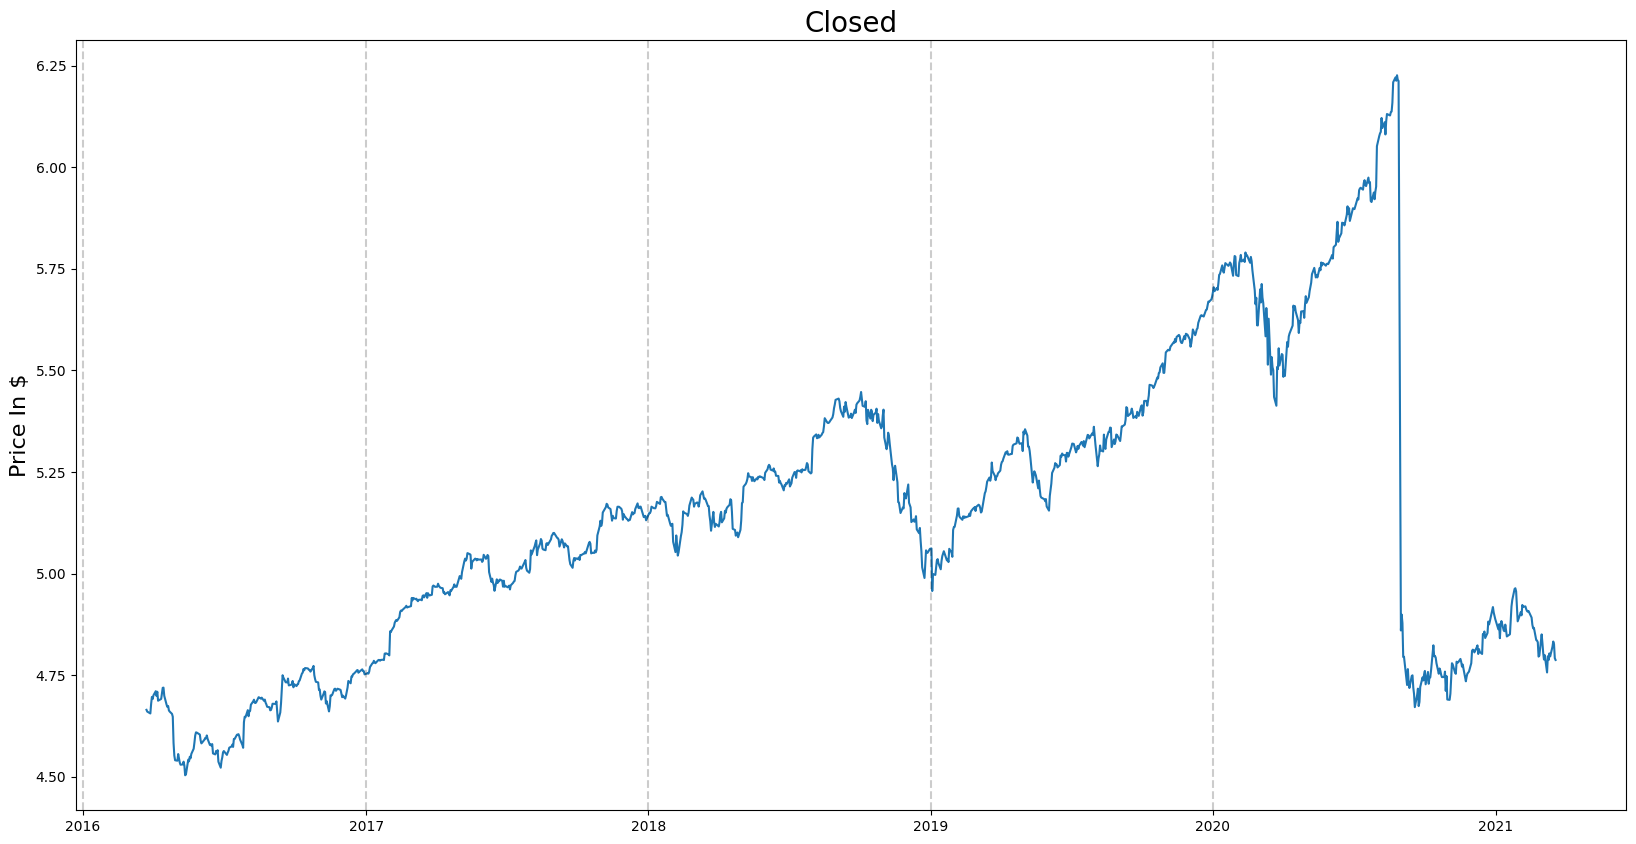

In [9]:
# Plotting the data

plt.figure(figsize=(20,10))
plt.plot(df2.close)
plt.title('Closed', fontsize=20)
plt.ylabel('Price In $', fontsize=16)
for year in range(2016,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [10]:
# Checking Dickey-Fuller test to find if data is stationary 

hypo1 = adfuller(df2.close)
print(hypo1)

(np.float64(-2.1900940451827196), np.float64(0.20986037187155765), 6, 1250, {'1%': np.float64(-3.435592223709696), '5%': np.float64(-2.8638549702604803), '10%': np.float64(-2.56800251776)}, np.float64(-4258.202145300758))


In [11]:
first_diffs = df2.close - df2.close.shift(1)

In [12]:
# Applying transformation to make data statinoary

df2['FirstDifference'] = first_diffs

In [13]:
df2.dropna(inplace=True)

In [14]:
hypo2 = adfuller(df2.FirstDifference)
print(hypo2)

(np.float64(-14.410721338789198), np.float64(8.213462036815169e-27), 5, 1250, {'1%': np.float64(-3.435592223709696), '5%': np.float64(-2.8638549702604803), '10%': np.float64(-2.56800251776)}, np.float64(-4252.97771704041))


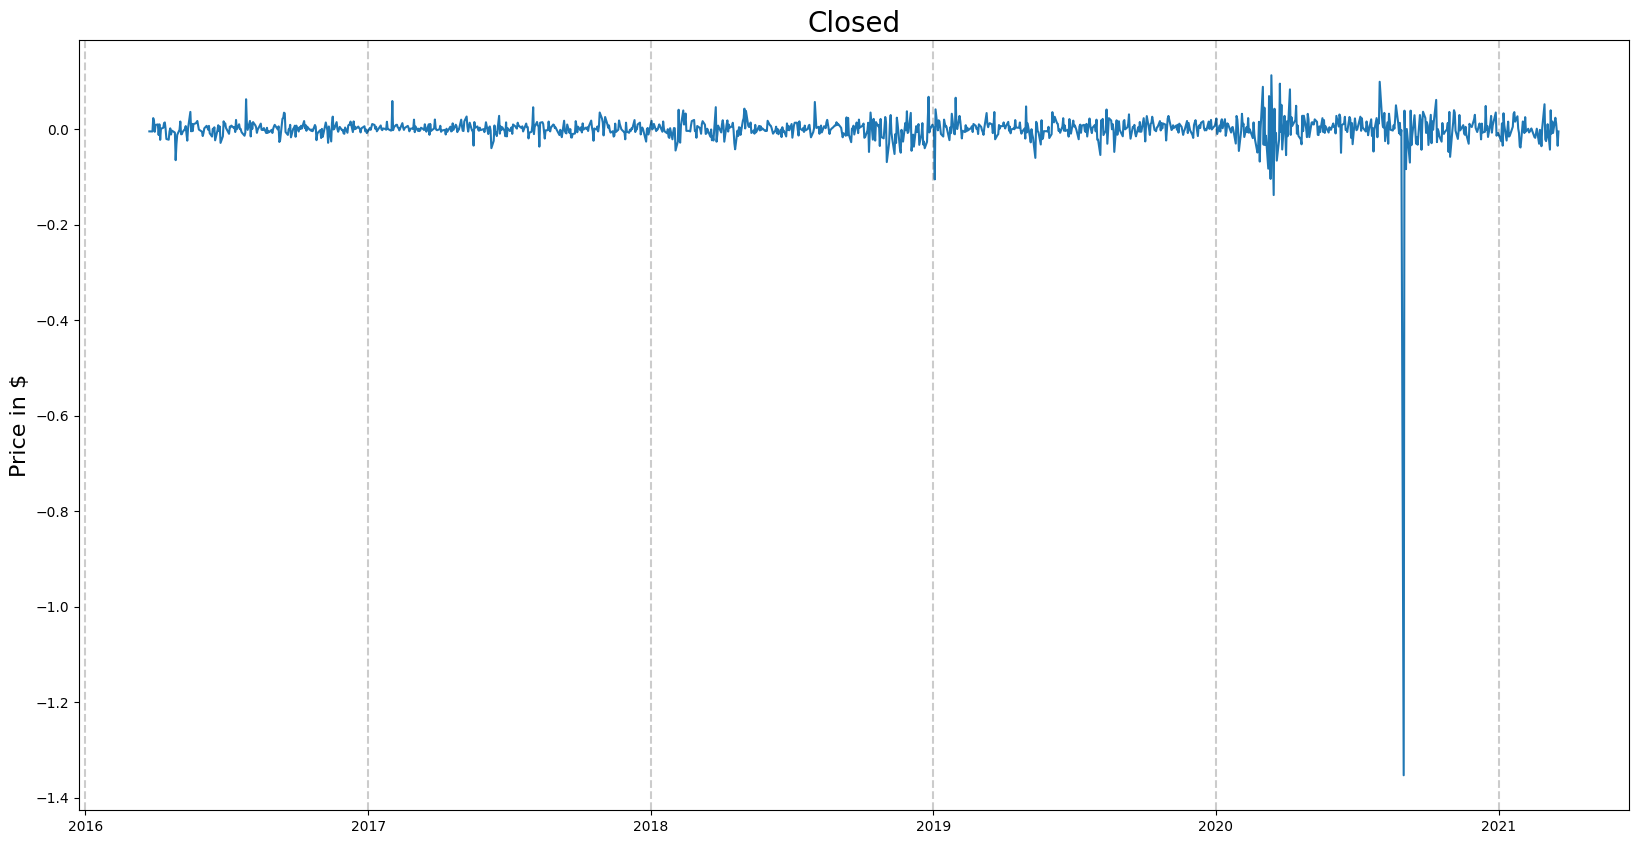

In [15]:
# Plotting the data which is now statinoary

plt.figure(figsize=(20,10))
plt.plot(df2.FirstDifference)
plt.title('Closed', fontsize=20)
plt.ylabel('Price in $', fontsize=16)
for year in range(2016,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

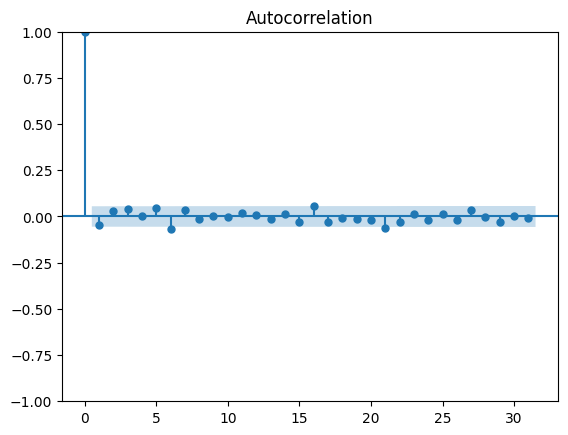

In [16]:
# Plotting ACF plot to choose value for MA 

plot_acf(df2.FirstDifference)
plt.show()

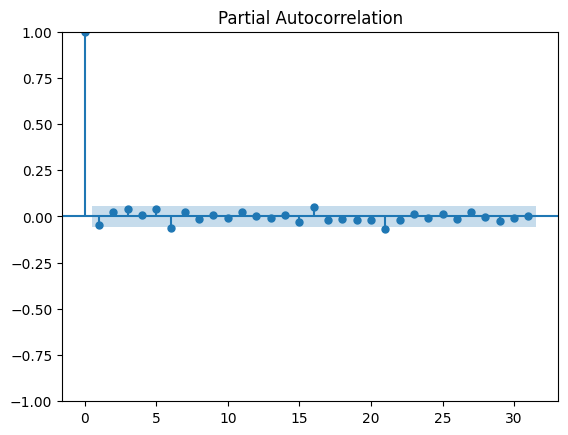

In [17]:
# Plotting PACF plot to choose value for AR

plot_pacf(df2.FirstDifference)
plt.show()

In [19]:
# Creating the ARIMA model and fitting the values
from statsmodels.tsa.arima.model import ARIMA  # ✅ modern ARIMA

model = ARIMA(df2.FirstDifference.dropna(), order=(1,1,0))
result = model.fit()

e:\Anaconda\envs\ai-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Anaconda\envs\ai-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Anaconda\envs\ai-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
# Summary for ARIMA model

fvalues = result.fittedvalues
result.summary()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:        FirstDifference   No. Observations:                 1256
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1925.078
Date:                Sat, 19 Jul 2025   AIC                          -3846.156
Time:                        23:42:12   BIC                          -3835.886
Sample:                             0   HQIC                         -3842.296
                               - 1256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5346      0.002   -258.135      0.000      -0.539      -0.531
sigma2         0.0027   7.71e-06    352.994      0.000       0.003       0.003
Ljung-Box (L1) (Q):                  46.50   Jarque-

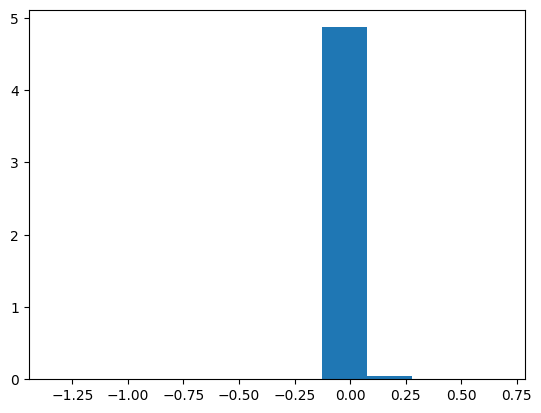

In [23]:
# Plotting residual plot

residual = result.resid
plt.hist(residual, density=True)
plt.show()

[]

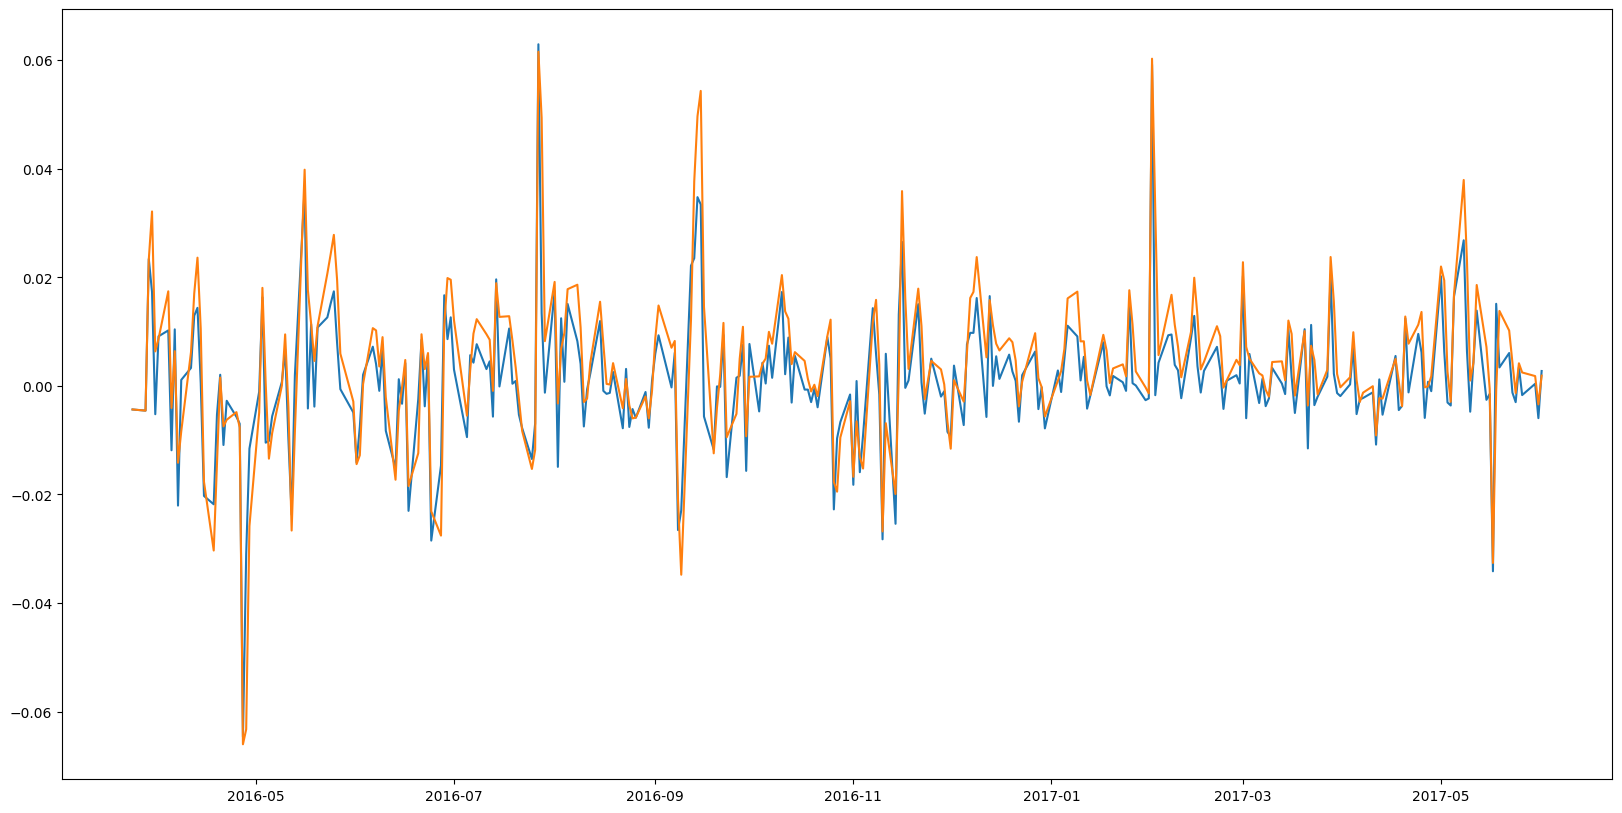

In [24]:
# Plotting the transformed fitted value 

residual = residual.cumsum()
plt.figure(figsize=(20,10))
plt.plot(df2.FirstDifference[:300])
plt.plot(residual[:300])
plt.plot()

In [25]:
# Inversing the transformation to get original data back

a = df2.close - df2.FirstDifference
diff_results = residual + residual.shift(-1)
diff_results = diff_results + a

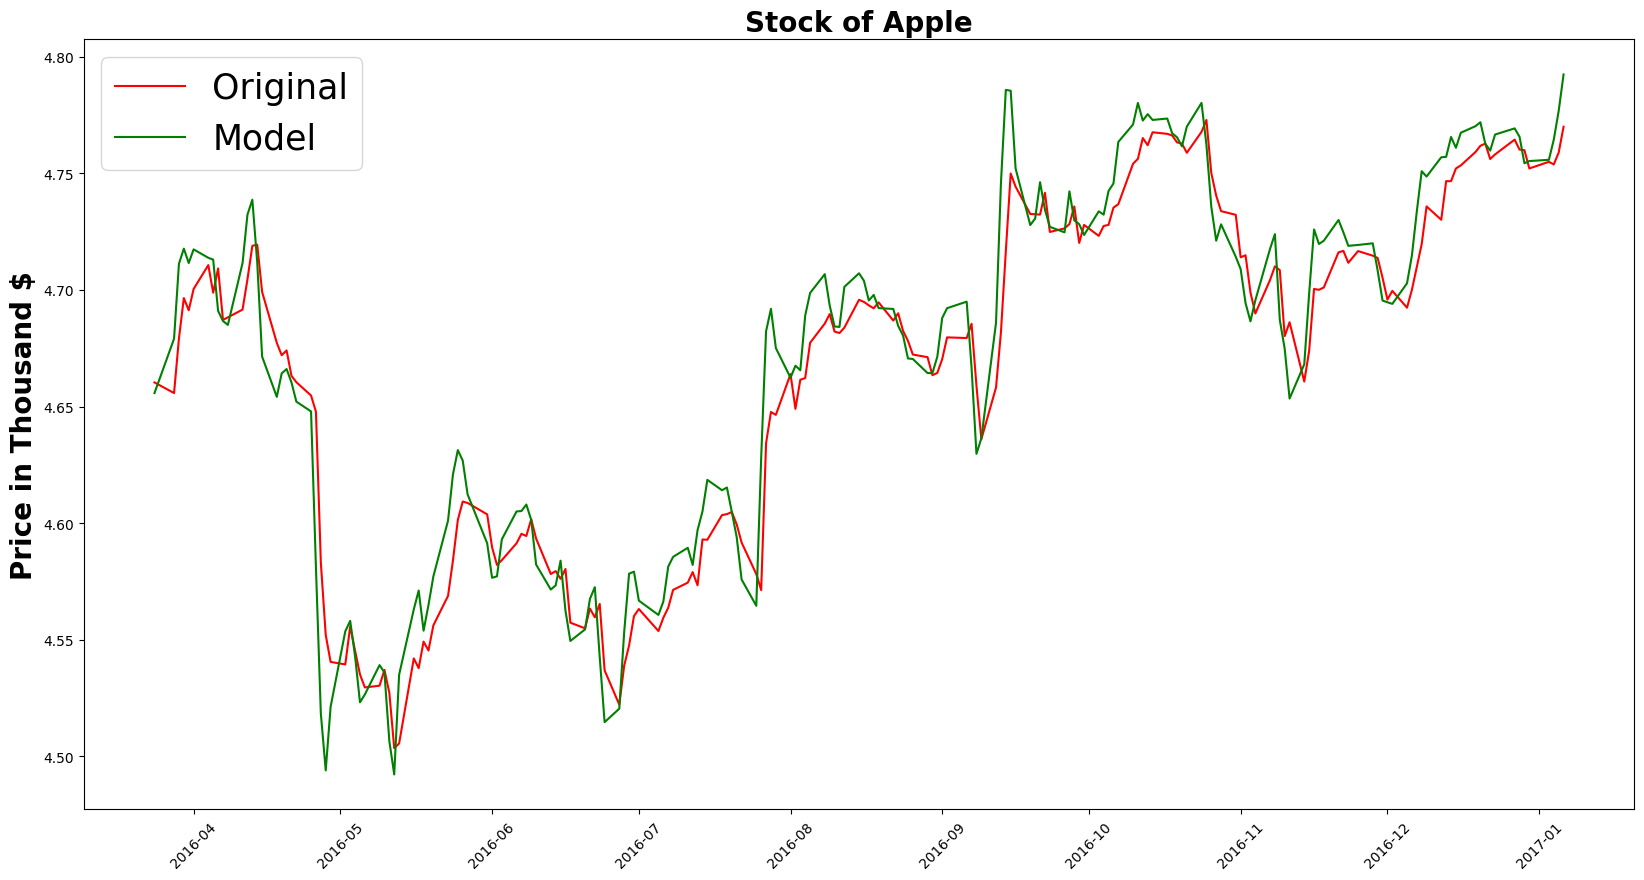

In [26]:
# Plotting the original fitted value

plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:200].close, label='Original', color='red')
plt.plot(diff_results[:200], label='Model', color='green')
plt.title('Stock of Apple', fontweight='bold', fontsize=20)
plt.ylabel('Price in Thousand $', fontweight='bold', fontsize=20)
plt.xticks(rotation=45)
plt.legend(prop={'size':25})
plt.show()

In [27]:
df1 = diff_results

In [28]:
df1.dropna(inplace=True)

In [29]:
# Normalizing the data 

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [32]:
print(df1.shape)  

df1 = df1.reshape(1255)

(1255, 1)


In [33]:
# Defining the train and test data size

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[:training_size],df1[training_size:]

In [34]:
len(train_data), len(test_data)

(815, 440)

In [35]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step)]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step])
	return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [36]:
X_train.shape, y_train.shape

((754, 60), (754,))

In [37]:
X_test.shape, y_test.shape

((379, 60), (379,))

In [38]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
len(X_train), len(y_train), len(X_test), len(y_test)

(754, 754, 379, 379)

In [40]:
# Creating LSTM model

model=Sequential()
model.add(LSTM(30, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

e:\Anaconda\envs\ai-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# Summary for LSTM model

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30)             │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,871 (15.12 KB)

 Trainable params: 3,871 (15.12 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Fiting data into LSTM model

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0000e+00 - loss: 0.0069 - val_accuracy: 0.0026 - val_loss: 0.0190
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.0000e+00 - loss: 0.0061 - val_accuracy: 0.0026 - val_loss: 0.0184
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.0000e+00 - loss: 0.0060 - val_accuracy: 0.0026 - val_loss: 0.0169
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0000e+00 - loss: 0.0054 - val_accuracy: 0.0026 - val_loss: 0.0155
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.0000e+00 - loss: 0.0056 - val_accuracy: 0.0026 - val_loss: 0.0168
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.0000e+00 - loss: 0.0051 - val_accuracy: 0.0026 - val_loss: 0.0136
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0052 - val_accuracy: 0.0026 - val_loss: 0.0144
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0000e+00 - loss: 0

In [44]:
# Predicting the values from fitted data

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [45]:
# Calculating root mean square error

rmse = math.sqrt(mean_squared_error(y_test,test_predict))
print(rmse)

0.09271874450674591


In [46]:
final_test = pd.DataFrame(df2[878:])

In [47]:
final_test

,close,FirstDifference
date,,
2019-09-19,5.397982,-0.008158
2019-09-20,5.383256,-0.014726
2019-09-23,5.387792,0.004537
2019-09-24,5.383026,-0.004766
2019-09-25,5.398298,0.015272
...,...,...
2021-03-15,4.820201,0.024162
2021-03-16,4.832863,0.012662
2021-03-17,4.826392,-0.006471


In [57]:
# test = pd.DataFrame({
#     'Actual': original_y_test.flatten(),
#     'Predicted': final_test.flatten()
# })

In [58]:
# # test['Predicted'] = final_test
# print("test_predict shape:", test_predict.shape)
# print("test shape:", test.shape)


In [59]:
# Unscale the predicted values
final_test = scaler.inverse_transform(test_predict)

# Unscale the actual y_test values
actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create DataFrame for comparison
test = pd.DataFrame({
    'Actual': actual_test.flatten(),
    'Predicted': final_test.flatten()
})


In [60]:
print("DataFrame length:", len(df))
print("Values length:", len(final_test))  


DataFrame length: 1257
Values length: 379


In [61]:
# Un-normalizing the data

final_test = scaler.inverse_transform(test_predict)[:test.shape[0]]  # trim the last one
test['Predicted'] = final_test


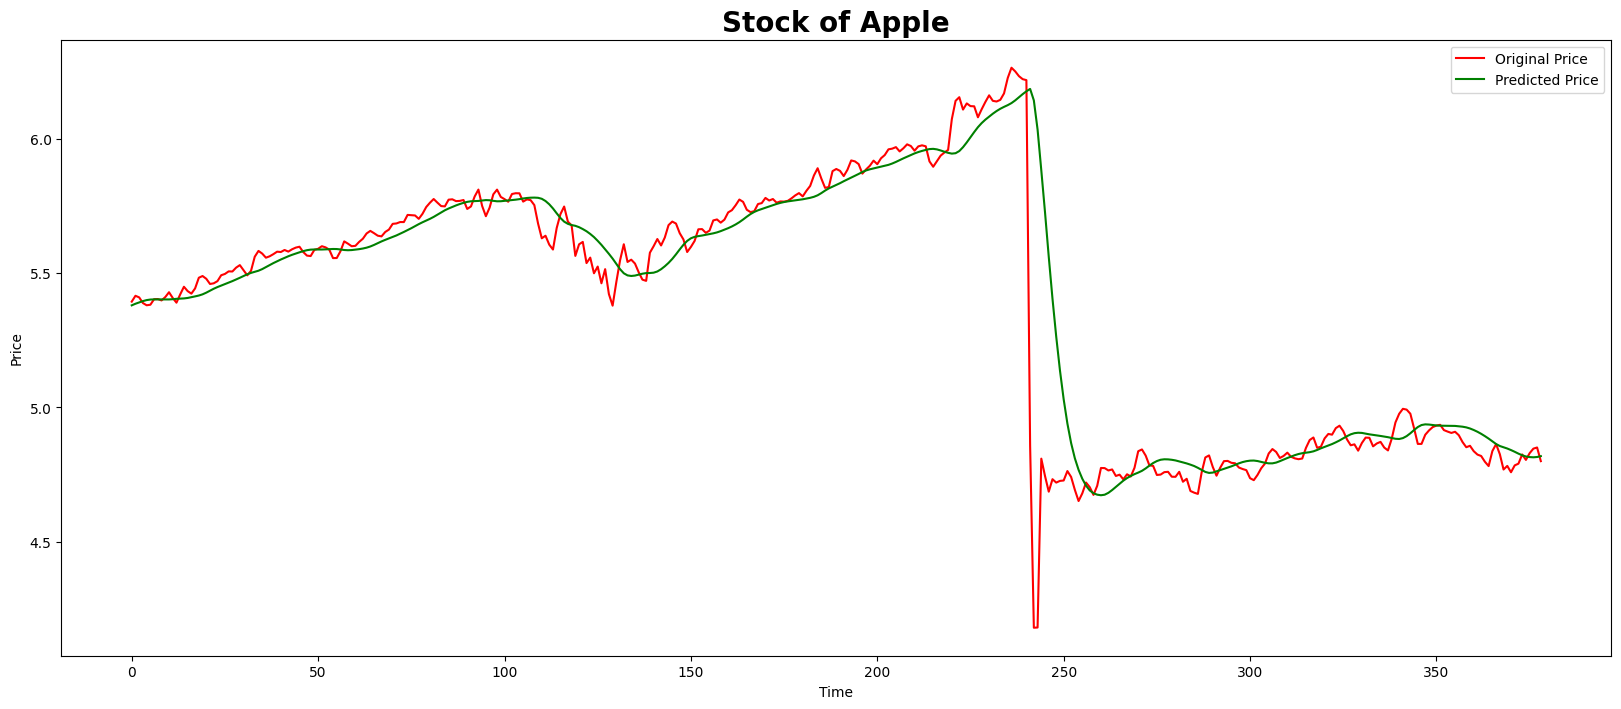

In [63]:
# Plotting the predictied price wrt original price

plt.figure(figsize=(20, 8))
plt.plot(test['Actual'], label='Original Price', color='red')
plt.plot(test['Predicted'], label='Predicted Price', color='green')
plt.title('Stock of Apple', fontweight='bold', fontsize=20)
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
